In [1]:
# установка pandas-profiling 
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     | 21.9 MB 17.6 MB/s 0:00:02
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 538.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 7.1 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=04892f5b306cdcce0931e80aa41b0e853d35fb7ece99e87b9b433fb4e4372107
  Stored in directory: /tmp/pip-ephem-wheel-cache-s04vu1f4/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: tangled-up-in-unicode
    Found existing installation: tangled-up-in-unicode 0.1.0
    Uninstalling tangled-up-in-unicode-0.1.0:
      Successfully uninstalled tangled-up-in-unicode-0.1.0
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninst

In [2]:
# установка tensor flow
!pip install - q tensorflow == 2.3

ERROR: Invalid requirement: '-'


In [3]:
# установка библиотеки для аугментации изображений
!pip install albumentations - q

ERROR: Invalid requirement: '-'


In [4]:
# установка библиотеки для лемматизации текста
!pip install pymorphy2
!pip install pymorphy2-dicts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 143.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 5.2 MB/s eta 0:00:00


In [5]:
# установка остальных библиотек

import seaborn as sns
import random
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import PIL
import cv2
import re
import pymorphy2
from nltk.corpus import stopwords
from datetime import datetime

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import *
from sklearn.model_selection import RandomizedSearchCV

# keras
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import *
from tensorflow.keras.optimizers.schedules import *
from tensorflow.keras.applications.xception import Xception
import albumentations as a

# plt
import matplotlib.pyplot as plt
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


In [6]:
print('Python       :', sys.version.split('\n')[0])
print('Numpy        :', np.__version__)
print('Tensorflow   :', tf.__version__)

Python       : 3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
Numpy        : 1.21.6
Tensorflow   : 2.6.4


In [7]:
# функция для выычисления используемой метрики MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [8]:
# объявление переменных
RANDOM_SEED = 42
VAL_SIZE=0.2
np.random.seed(RANDOM_SEED)

In [9]:
!pip freeze > requirements.txt

# 1. DATA

In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
#import zipfile
#zip_file='/content/drive/MyDrive/cars.zip'
#z=zipfile.ZipFile(zip_file, 'r')
#z.extractall(path='/content/drive/MyDrive/cars/')
#print(os.listdir())

#датасет для работы расположен по адресу https://drive.google.com/file/d/1qe93KopL4EJdKHuFkRCcZv0wE3af61fy/view?usp=sharing

In [12]:
DATA_DIR = '../input/sf-dst-car-price-prediction-part2/'
train = pd.read_csv(DATA_DIR + 'train.csv')
test = pd.read_csv(DATA_DIR + 'test.csv')
sample_submission = pd.read_csv(DATA_DIR + 'sample_submission.csv')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6682 entries, 0 to 6681
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              6682 non-null   object 
 1   brand                 6682 non-null   object 
 2   color                 6682 non-null   object 
 3   description           6682 non-null   object 
 4   engineDisplacement    6682 non-null   object 
 5   enginePower           6682 non-null   object 
 6   fuelType              6682 non-null   object 
 7   mileage               6682 non-null   int64  
 8   modelDate             6682 non-null   int64  
 9   model_info            6682 non-null   object 
 10  name                  6682 non-null   object 
 11  numberOfDoors         6682 non-null   int64  
 12  price                 6682 non-null   float64
 13  productionDate        6682 non-null   int64  
 14  sell_id               6682 non-null   int64  
 15  vehicleConfiguration 

In [14]:
train.nunique()

bodyType                  17
brand                      3
color                     16
description             6147
engineDisplacement        48
enginePower              146
fuelType                   4
mileage                 2900
modelDate                 41
model_info               118
name                     900
numberOfDoors              4
price                   1628
productionDate            38
sell_id                 6682
vehicleConfiguration     288
vehicleTransmission        4
Владельцы                  3
Владение                 173
ПТС                        2
Привод                     3
Руль                       2
dtype: int64

In [15]:
train.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
price                      0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  1
Владение                4326
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bodyType              1671 non-null   object
 1   brand                 1671 non-null   object
 2   color                 1671 non-null   object
 3   description           1671 non-null   object
 4   engineDisplacement    1671 non-null   object
 5   enginePower           1671 non-null   object
 6   fuelType              1671 non-null   object
 7   mileage               1671 non-null   int64 
 8   modelDate             1671 non-null   int64 
 9   model_info            1671 non-null   object
 10  name                  1671 non-null   object
 11  numberOfDoors         1671 non-null   int64 
 12  productionDate        1671 non-null   int64 
 13  sell_id               1671 non-null   int64 
 14  vehicleConfiguration  1671 non-null   object
 15  vehicleTransmission   1671 non-null   

In [17]:
test.nunique()

bodyType                  14
brand                      3
color                     15
description             1540
engineDisplacement        43
enginePower              120
fuelType                   4
mileage                  935
modelDate                 37
model_info               101
name                     536
numberOfDoors              4
productionDate            35
sell_id                 1671
vehicleConfiguration     205
vehicleTransmission        4
Владельцы                  3
Владение                 131
ПТС                        2
Привод                     3
Руль                       1
dtype: int64

In [18]:
test.isna().sum()

bodyType                   0
brand                      0
color                      0
description                0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_info                 0
name                       0
numberOfDoors              0
productionDate             0
sell_id                    0
vehicleConfiguration       0
vehicleTransmission        0
Владельцы                  0
Владение                1092
ПТС                        0
Привод                     0
Руль                       0
dtype: int64

In [19]:
# split данных
data_train, data_test = train_test_split(
    train, test_size=0.2, shuffle=True, random_state=RANDOM_SEED)

# 2. EDA и Feature-Engeneering

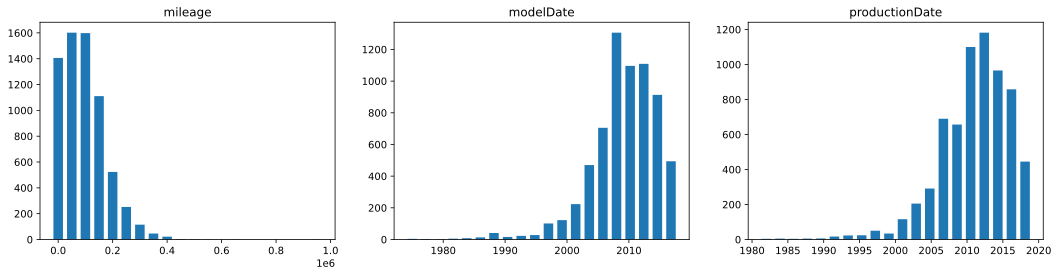

In [20]:
# распределение числовых признаков
def visualize_distributions(titles_values_dict):
    columns = min(3, len(titles_values_dict))
    rows = (len(titles_values_dict) - 1) // columns + 1
    fig = plt.figure(figsize=(columns * 6, rows * 4))
    for i, (title, values) in enumerate(titles_values_dict.items()):
        hist, bins = np.histogram(values, bins=20)
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.bar(bins[:-1], hist, width=(bins[1] - bins[0]) * 0.7)
        ax.set_title(title)
    plt.show()


visualize_distributions({
    'mileage': train['mileage'].dropna(),
    'modelDate': train['modelDate'].dropna(),
    'productionDate': train['productionDate'].dropna()
})

## 3.1. Предобработка табличных данных

In [21]:
# объединение трейна и теста в один датасет
train['sample'] = 1  # трейн
test['sample'] = 0  # тест
test['price'] = 0  # в тесте нет значения price,  заполняем нулями

data = test.append(train, sort=False).reset_index(drop=True)  # объединяем
print(train.shape, test.shape, data.shape)

(6682, 23) (1671, 23) (8353, 23)


In [22]:
# посмотрим так же на общий отчет с помощью PandasProfiling 
# повторный импорт библиотек здесь для фикса проблем с запуском PandasProfiling в разных средах- они часто возникают
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [23]:
profile = ProfileReport(data, title='data_report', html={'style':{'full_width':True}})

In [24]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
profile.to_file(output_file="data_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 3.1.1. bodyType

In [26]:
data.bodyType.unique()

array(['универсал 5 дв.', 'купе', 'седан', 'внедорожник 5 дв.', 'родстер',
       'лифтбек', 'хэтчбек 3 дв.', 'хэтчбек 5 дв.', 'купе-хардтоп',
       'внедорожник 3 дв.', 'минивэн', 'кабриолет',
       'пикап двойная кабина', 'внедорожник открытый', 'компактвэн',
       'седан 2 дв.', 'лимузин'], dtype=object)

In [27]:
# Выбираем первое слово для описания типа кузова
data['bodyType'] = data['bodyType'].astype(
    str).apply(lambda x: None if x.strip() == '' else x)
# Понижаем регистр первого слова
data['bodyType'] = data.bodyType.apply(lambda x: x.split(' ')[0].lower())

In [28]:
train.bodyType.unique()

array(['седан', 'лифтбек', 'внедорожник 5 дв.', 'хэтчбек 5 дв.',
       'минивэн', 'универсал 5 дв.', 'купе-хардтоп', 'купе', 'кабриолет',
       'родстер', 'хэтчбек 3 дв.', 'компактвэн', 'пикап двойная кабина',
       'внедорожник открытый', 'седан 2 дв.', 'внедорожник 3 дв.',
       'лимузин'], dtype=object)

<AxesSubplot:>

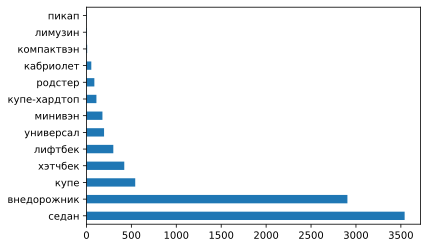

In [29]:
data.bodyType.value_counts().plot.barh()

### 3.1.2. brand

In [30]:
data.brand.unique()

array(['MERCEDES', 'BMW', 'AUDI'], dtype=object)

<AxesSubplot:>

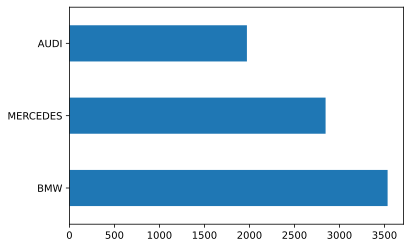

In [31]:
data.brand.value_counts().plot.barh()

### 3.1.3. color

In [32]:
data.color.nunique()

16

<AxesSubplot:>

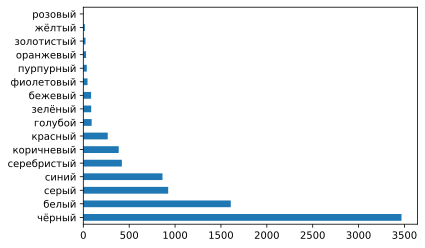

In [33]:
data.color.value_counts().plot.barh()

### 3.1.4. description

In [34]:
data['comment_length'] = data.description.apply(lambda x: len(str(x)))

<AxesSubplot:>

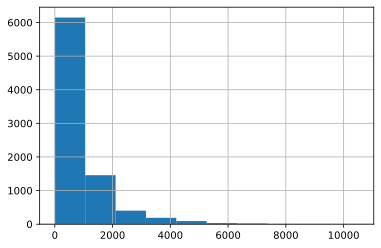

In [35]:
data.comment_length.hist()

### 3.1.5. engineDisplacement

In [36]:
data.engineDisplacement.unique()

array(['3.0 LTR', '2.5 LTR', '2.0 LTR', '3.5 LTR', '1.8 LTR', '2.2 LTR',
       '5.5 LTR', '4.8 LTR', '1.6 LTR', '4.7 LTR', '4.0 LTR', '1.5 LTR',
       '2.4 LTR', '1.4 LTR', '2.1 LTR', '5.2 LTR', '4.4 LTR', '2.8 LTR',
       '4.2 LTR', '3.2 LTR', '6.0 LTR', '3.7 LTR', '5.0 LTR', '1.2 LTR',
       '3.6 LTR', '2.3 LTR', '6.2 LTR', '1.7 LTR', '1.3 LTR', '5.4 LTR',
       '3.1 LTR', '2.6 LTR', '3.8 LTR', '4.1 LTR', '2.9 LTR', '6.6 LTR',
       '5.9 LTR', 'undefined LTR', '2.7 LTR', '0.7 LTR', '1.9 LTR',
       '4.3 LTR', '5.8 LTR', '4.9 LTR', '3.4 LTR', '6.3 LTR', '5.6 LTR',
       '4.6 LTR'], dtype=object)

In [37]:
data.engineDisplacement = data.engineDisplacement.apply(lambda x: x[:3])

In [38]:
data.engineDisplacement.value_counts()

2.0    2430
3.0    2349
1.8     411
1.6     410
4.4     329
5.5     268
3.5     250
2.5     248
2.1     221
4.0     153
4.7     137
2.8     106
1.4     106
4.2     103
5.0      74
1.5      73
3.2      60
2.2      58
4.8      57
2.9      50
2.4      44
3.1      44
6.2      40
6.0      37
5.4      33
1.2      33
1.3      32
2.7      24
4.1      23
3.6      23
1.7      15
2.3      14
3.7      14
5.2      13
5.9      11
2.6       9
und       6
0.7       6
6.6       5
1.9       5
5.8       5
4.6       5
4.3       4
3.4       4
3.8       3
6.3       3
5.6       3
4.9       2
Name: engineDisplacement, dtype: int64

In [39]:
data.engineDisplacement = data.engineDisplacement.replace(
    'und', data.engineDisplacement.mode()[0])

In [40]:
data.engineDisplacement.unique()

array(['3.0', '2.5', '2.0', '3.5', '1.8', '2.2', '5.5', '4.8', '1.6',
       '4.7', '4.0', '1.5', '2.4', '1.4', '2.1', '5.2', '4.4', '2.8',
       '4.2', '3.2', '6.0', '3.7', '5.0', '1.2', '3.6', '2.3', '6.2',
       '1.7', '1.3', '5.4', '3.1', '2.6', '3.8', '4.1', '2.9', '6.6',
       '5.9', '2.7', '0.7', '1.9', '4.3', '5.8', '4.9', '3.4', '6.3',
       '5.6', '4.6'], dtype=object)

In [41]:
data.engineDisplacement = data.engineDisplacement.apply(lambda x: float(x))

<AxesSubplot:>

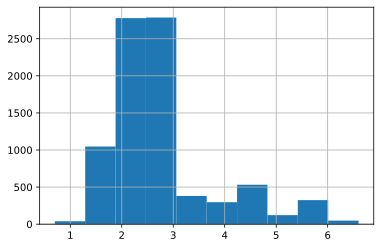

In [42]:
data.engineDisplacement.hist()

### 3.1.6. enginePower

In [43]:
data.enginePower.unique()

array(['220 N12', '313 N12', '218 N12', '136 N12', '190 N12', '340 N12',
       '245 N12', '316 N12', '170 N12', '160 N12', '231 N12', '388 N12',
       '180 N12', '367 N12', '115 N12', '184 N12', '177 N12', '455 N12',
       '422 N12', '163 N12', '249 N12', '272 N12', '224 N12', '122 N12',
       '557 N12', '333 N12', '306 N12', '156 N12', '150 N12', '264 N12',
       '450 N12', '555 N12', '407 N12', '130 N12', '400 N12', '204 N12',
       '469 N12', '192 N12', '210 N12', '211 N12', '239 N12', '200 N12',
       '350 N12', '420 N12', '300 N12', '381 N12', '265 N12', '258 N12',
       '390 N12', '197 N12', '120 N12', '544 N12', '193 N12', '235 N12',
       '233 N12', '394 N12', '355 N12', '421 N12', '320 N12', '585 N12',
       '105 N12', '280 N12', '194 N12', '132 N12', '639 N12', '250 N12',
       '335 N12', '510 N12', '116 N12', '360 N12', '238 N12', '225 N12',
       '625 N12', '571 N12', '507 N12', '286 N12', '372 N12', '575 N12',
       '408 N12', '310 N12', '354 N12', '255 N12', 

In [44]:
# берем 1 символ, если длина строки 5, первые два если 6,в противном случае первые три символа
data['enginePower'] = data['enginePower'].apply(
    lambda x: x[:1] if len(x) == 5 else (x[:2] if len(x) == 6 else x[:3]))

In [45]:
data.enginePower.unique()

array(['220', '313', '218', '136', '190', '340', '245', '316', '170',
       '160', '231', '388', '180', '367', '115', '184', '177', '455',
       '422', '163', '249', '272', '224', '122', '557', '333', '306',
       '156', '150', '264', '450', '555', '407', '130', '400', '204',
       '469', '192', '210', '211', '239', '200', '350', '420', '300',
       '381', '265', '258', '390', '197', '120', '544', '193', '235',
       '233', '394', '355', '421', '320', '585', '105', '280', '194',
       '132', '639', '250', '335', '510', '116', '360', '238', '225',
       '625', '571', '507', '286', '372', '575', '408', '310', '354',
       '255', '435', '525', '591', '109', '462', '143', '279', '487',
       '560', '125', '609', '102', '290', '296', '230', '326', '269',
       '445', '580', '370', '401', '129', '500', '270', '140', '110',
       '476', '166', '321', '626', '252', '612', '113', '101', '240',
       '605', '700', '133', '95', '558', '271', '82', '530', '329', '517',
       '118', '

<AxesSubplot:>

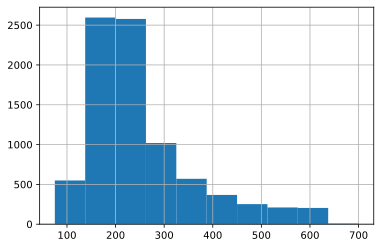

In [46]:
data['enginePower'] = data['enginePower'].apply(lambda x: int(x))
data.enginePower.hist()

### 3.1.7. fuelType

In [47]:
data.fuelType.value_counts()

бензин     6018
дизель     2315
гибрид       14
электро       6
Name: fuelType, dtype: int64

<AxesSubplot:>

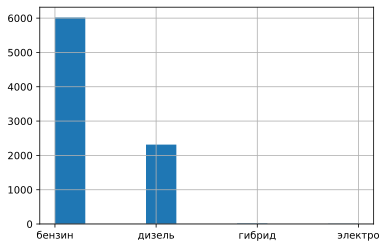

In [48]:
data.fuelType.hist()

### 3.1.8. mileage

In [49]:
data.mileage.unique()

array([350000,  15000, 166600, ..., 232777,  33700,  21291])

<AxesSubplot:>

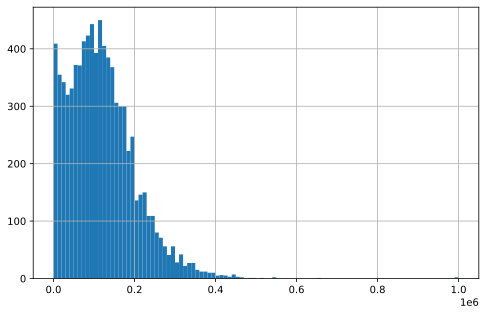

In [50]:
data.mileage.hist(figsize=(8, 5), bins=100)

In [51]:
IQR = data['mileage'].quantile(0.75) - data['mileage'].quantile(0.25)
perc25 = data['mileage'].quantile(0.25)  # 25-й перцентиль
perc75 = data['mileage'].quantile(0.75)  # 75-й перцентиль

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR,
                                           l=perc75 + 1.5*IQR))

25-й перцентиль: 59246.0, 75-й перцентиль: 167084.0, IQR: 107838.0,  Границы выбросов: [-102511.0, 328841.0].


In [52]:
data.mileage[data.mileage > 328841].count()

161

### 3.1.9. modelDate

In [53]:
data.modelDate.unique()

array([1984, 2011, 2005, 2016, 2009, 2008, 2007, 1989, 2001, 2006, 2013,
       2014, 2015, 2004, 2017, 2018, 2012, 2003, 2019, 2010, 2000, 1990,
       2002, 1998, 1993, 1994, 1999, 1995, 1971, 1996, 1985, 1975, 1992,
       1997, 1987, 1979, 1991, 1982, 1986, 1988, 1981, 1977, 1976])

<AxesSubplot:>

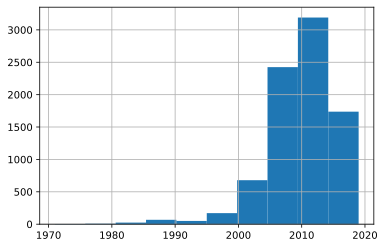

In [54]:
data.modelDate.hist()

In [55]:
data['model_time'] = datetime.now().year - data.modelDate

### 3.1.10 model_info

In [56]:
data.model_info.value_counts()

5ER         776
3ER         578
X5          501
E_KLASSE    490
A6          433
           ... 
None          1
Z8            1
COUPE         1
Z3M           1
W201          1
Name: model_info, Length: 122, dtype: int64

In [57]:
data.loc[data['model_info'] == 'None']

bodyType     brand  color  \
2803    седан  MERCEDES  серый   

                                            description  engineDisplacement  \
2803  Автомобиль в очень хорошем состоянии. Богатая ...                 4.0   

      enginePower fuelType  mileage  modelDate model_info  ...  \
2803          510   бензин    41000       2014       None  ...   

     vehicleTransmission    Владельцы  Владение       ПТС  Привод   Руль  \
2803      автоматическая  3 или более       NaN  Дубликат  задний  Левый   

     sample      price comment_length model_time  
2803      1  3700000.0             85          8  

[1 rows x 25 columns]

In [58]:
data.iloc[2803]['description']

'Автомобиль в очень хорошем состоянии. Богатая комплектация. По всем вопросом звоните.'

### 3.1.11. name

In [59]:
data['xDrive'] = data['name'].apply(lambda x: 1 if 'xDrive' in x else 0)

<AxesSubplot:xlabel='xDrive', ylabel='count'>

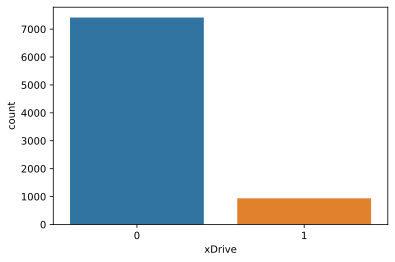

In [60]:
sns.countplot(x='xDrive', data=data)

### 3.1.12. numberOfDoors

In [61]:
data.numberOfDoors.unique()

array([5, 2, 4, 3])

<AxesSubplot:xlabel='numberOfDoors', ylabel='count'>

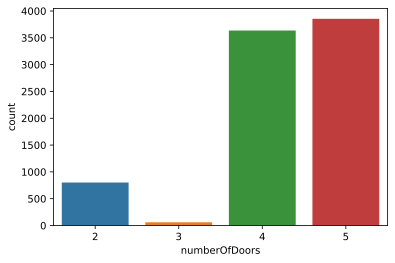

In [62]:
sns.countplot(x='numberOfDoors', data=data)

### 3.1.13. productionDate

In [63]:
data[['modelDate', 'productionDate']].corr()

modelDate  productionDate
modelDate        1.000000        0.964919
productionDate   0.964919        1.000000

### 3.1.14. sell_id

### 3.1.15. vehicleConfiguration

### 3.1.16. vehicleTransmission

In [64]:
data.vehicleTransmission.unique()

array(['автоматическая', 'вариатор', 'роботизированная', 'механическая'],
      dtype=object)

<AxesSubplot:xlabel='vehicleTransmission', ylabel='count'>

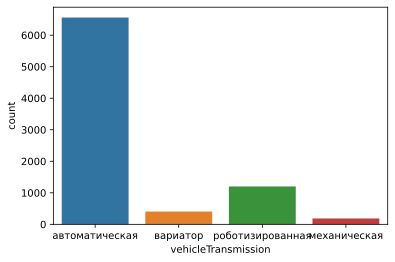

In [65]:
sns.countplot(x='vehicleTransmission', data=data)

### 3.1.17. Владельцы

In [66]:
data.Владельцы.isna().sum()

1

In [67]:
data[data['Владельцы'].isnull()]

bodyType brand   color  \
6665    седан  AUDI  чёрный   

                                            description  engineDisplacement  \
6665  машина в идеале! вложено примерно 400тыс.руб \...                 4.2   

      enginePower fuelType  mileage  modelDate model_info  ... Владельцы  \
6665          360   бензин   160000       1999         S8  ...       NaN   

                Владение       ПТС  Привод   Руль sample     price  \
6665  10 лет и 7 месяцев  Оригинал  полный  Левый      1  600000.0   

     comment_length model_time xDrive  
6665            955         23      0  

[1 rows x 26 columns]

In [68]:
data.iloc[6665]['description']

'машина в идеале! вложено примерно 400тыс.руб \r\n замена ГРМ, всех расходников,\r\n двигатель контрактный с пробегом в 120,000км.\r\n рулевая рейка новая (не ремонтная а НОВАЯ!)\r\n новый кардан. \r\n новые гидро натяжители цепей 40тыс.руб. \r\n новый бензонасос, \r\n новая подвеска "бильштайн" \r\n и т.д. \r\n комплектация максимальная- черное дерево! штатный (снимаемый) фаркоп, предпусковой подогреватель WEBASTO, кованные диски (германия) R-20, телефон.\r\nНА ВТОРОМ ФОТО СТАРЫЙ РУЛЬ! СЕЙЧАС НОВЫЙ С ДЕРЕВОМ КАК НА ПОСЛЕДНИХ ФОТО... (старый отдам в довесок)\r\nнедавно сделана полная разводка глушителей, с установкой новых банок на обе трубы (на фото можно разглядеть снизу) банки от ренж ровер спорт, звук КЛАСС!!!\r\n много писать, звоните...\r\nфото 100% мои!\r\nвозможен обмен на битый или горевший  микроавтобус (фольксваген Т-5) мультиван свежих годов.\r\nСАЛОНЫ И ПРОЧИЕ "ПОМОЩНИКИ" ИДИТЕ ЛЕСОМ!!!!!!!!!\r\nфото 100% мои!\r\nпродажа НЕ срочная!!! с большим торгом не звонить.'

In [69]:
data.Владельцы = data.Владельцы.apply(
    lambda x: data.Владельцы.mode()[0] if pd.isna(x) else x)

In [70]:
data.Владельцы.isna().sum()

0

In [71]:
data['Владельцы'] = data['Владельцы'].apply(
    lambda x: int(x[0])).astype('int32')

<AxesSubplot:>

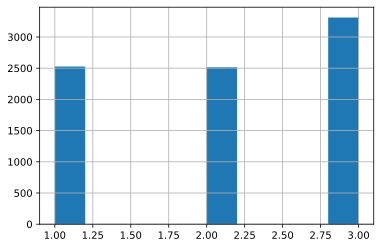

In [72]:
data.Владельцы.hist()

### 3.1.18. Владение

In [73]:
data.Владение.isna().sum()

5418

In [74]:
data.Владение.isna().sum()/len(data.Владение)*100

64.86292350053873

### 3.1.19. ПТС

In [75]:
data.ПТС.unique()

array(['Оригинал', 'Дубликат'], dtype=object)

<AxesSubplot:>

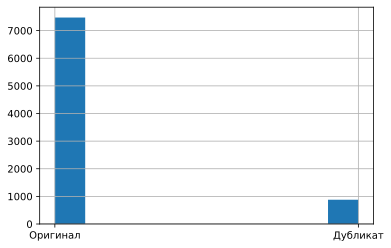

In [76]:
data.ПТС.hist()

### 3.1.20. Привод

<AxesSubplot:xlabel='Привод', ylabel='count'>

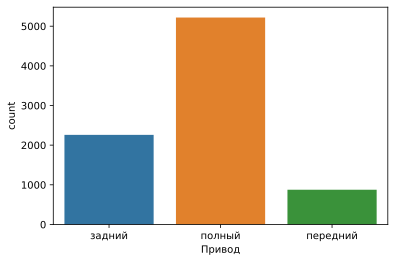

In [77]:
sns.countplot(x='Привод', data=data)

### 3.1.21. Руль

<AxesSubplot:xlabel='Руль', ylabel='count'>

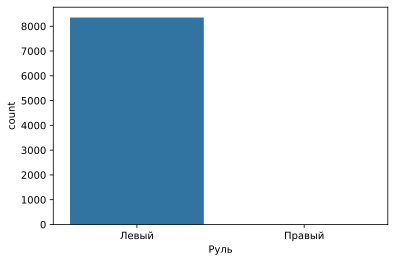

In [78]:
sns.countplot(x='Руль', data=data)

### 3.1.22. Целевой признак - price

In [79]:
data.iloc[6665]['price']

600000.0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


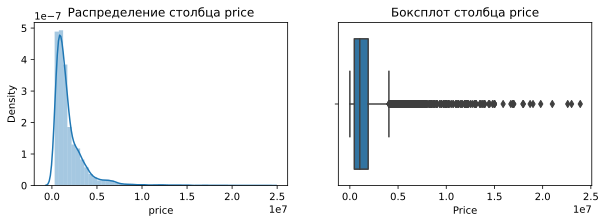

count    8.353000e+03
mean     1.519804e+06
std      1.873130e+06
min      0.000000e+00
25%      4.600000e+05
50%      1.030000e+06
75%      1.900000e+06
max      2.390000e+07
Name: price, dtype: float64

In [80]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title(f"Распределение столбца {'price'}")
sns.distplot((data[data['sample'] == 1]['price']), bins=50)

plt.subplot(1, 2, 2)
sns.boxplot(data['price'])
plt.xlabel('Price')
plt.title(f"Боксплот столбца {'price'}", fontsize=12)
plt.show()
data.price.describe()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


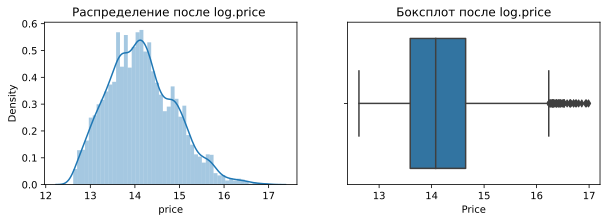

In [81]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.title(f"Распределение после log.{'price'} ")
sns.distplot(np.log(data[data['sample'] == 1]['price']), bins=50)

plt.subplot(1, 2, 2)
sns.boxplot(np.log(data[data['sample'] == 1]['price']))
plt.xlabel('Price')
plt.title('Боксплот после log.price', fontsize=12)
plt.show()

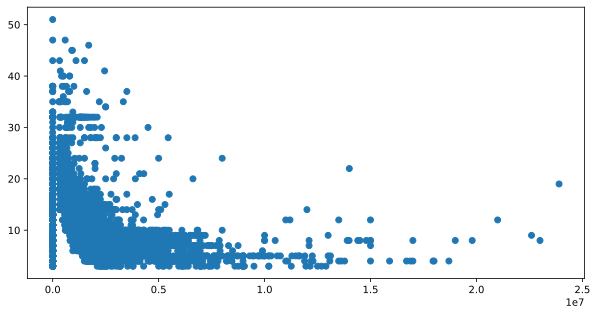

In [82]:
plt.figure(figsize=(10, 5))
plt.scatter((data.price), data.model_time)

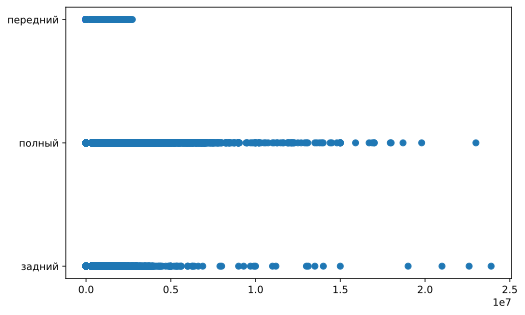

In [83]:
plt.figure(figsize=(8, 5))
plt.scatter((data.price), data.Привод)

In [84]:
# категориальные признаки
cat_features = ['bodyType', 'brand', 'color', 'fuelType', 'model_info',
                'numberOfDoors', 'vehicleTransmission', 'Владельцы', 'ПТС', 'Привод', 'Руль', 'xDrive']

# числовые признаки
num_features = ['mileage', 'modelDate', 'model_time',
                'engineDisplacement', 'enginePower', 'comment_length']

<AxesSubplot:>

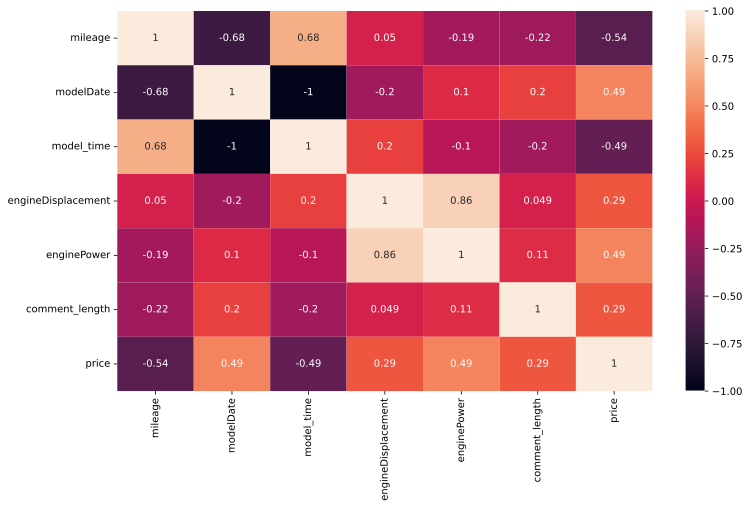

In [85]:
plt.figure(figsize=(12, 7))
sns.heatmap(data[data['sample'] == 1]
            [num_features + ['price']].corr(), annot=True)

In [86]:
data[['model_time', 'productionDate']].corr()

model_time  productionDate
model_time        1.000000       -0.964919
productionDate   -0.964919        1.000000

In [87]:
# числовые признаки
num_features = ['mileage', 'model_time', 'productionDate',
                'engineDisplacement', 'enginePower', 'comment_length']

In [88]:
def preproc_data(df_input):

    df_output = df_input.copy()

    #удалим неиспользуемые столбцы
    df_output.drop(['description', 'sell_id', 'vehicleConfiguration',
                    'Владение', 'name', 'modelDate'], axis=1, inplace=True)

    #нормализация

    scaler = RobustScaler()  # показал наилучший результат из всех scaler'ов
    for column in num_features:
        df_output[column] = scaler.fit_transform(df_output[[column]])[:, 0]

    #работа с категориальными признаками 
    # Label Encoding
    for column in cat_features:
        df_output[column], _ = pd.factorize(df_output[column])

    # One-Hot Encoding:
    df_output = pd.get_dummies(
        df_output, columns=cat_features, dummy_na=False)

    return df_output

In [89]:
# применяем функцию предобработки данных
df_preproc = preproc_data(data)
df_preproc.sample(10)

engineDisplacement  enginePower   mileage  productionDate  sample  \
7399                -0.8     0.114754 -0.031380        0.285714       1   
4273                -0.8     0.114754 -0.606317        0.428571       1   
3362                 2.7     2.901639 -0.513585        0.285714       1   
2794                 0.2     0.114754  0.135537       -0.285714       1   
5378                -0.8    -0.106557  0.358093        0.285714       1   
5902                 1.2     2.696721 -0.376342        0.000000       1   
1454                 0.2     0.729508 -0.534301        0.285714       0   
2476                -0.3    -0.106557  0.585285       -0.714286       1   
743                 -1.2    -0.950820  0.089171       -0.428571       0   
1168                 2.7     2.565574 -0.689775        0.142857       0   

          price  comment_length  model_time  bodyType_0  bodyType_1  ...  \
7399  1590000.0        0.333333   -0.428571           0           0  ...   
4273  3100000.0        0.255708   -0.285714           0           0  ...   
3362  3750000.0       -0.378995   -0.285714           0           0  ...   
2794  1990000.0        1.803653    0.000000           0           0  ...   
5378  1285000.0        0.551370   -0.285714           0           0  ...   
5902  3399999.0       -0.288813   -0.142857           1           0  ...   
1454        0.0        0.853881   -0.142857           0           0  ...   
2476   700000.0        0.688356    0.571429           0           0  ...   
743         0.0       -0.227169    0.571429           0           0  ...   
1168        0.0        3.407534   -0.142857           0           0  ...   

      Владельцы_2  ПТС_0  ПТС_1  Привод_0  Привод_1  Привод_2  Руль_0  Руль_1  \
7399            0      1      0         0         1         0       1       0   
4273            0      1      0         0         1         0       1       0   
3362            0      1      0         0         1         0       1       0   
2794            0      1      0         0         1         0       1       0   
5378            0      1      0         0         1         0       1       0   
5902            0      1      0         0         1         0       1       0   
1454            1      1      0         0         1         0       1       0   
2476            0      0      1         1         0         0       1       0   
743             0      1      0         1         0         0       1       0   
1168            0      1      0         0         1         0       1       0   

      xDrive_0  xDrive_1  
7399         0         1  
4273         1         0  
3362         1         0  
2794         1         0  
5378         0         1  
5902         1         0  
1454         0         1  
2476         1         0  
743          1         0  
1168         1         0  

[10 rows x 186 columns]

## 3.2. Split data

In [90]:
# обозначим переменные и разделим датасет обратно на тестовый и для обучения
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.price.values     # наш таргет
X = train_data.drop(['price'], axis=1)
X_sub = test_data.drop(['price'], axis=1)

In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1671 entries, 0 to 1670
Columns: 185 entries, engineDisplacement to xDrive_1
dtypes: float64(7), uint8(178)
memory usage: 394.9 KB


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

## 4 ML Model

In [93]:
# лучший процент предсказания удалось получить на стекинге с эстиматорами на Градиентном Бустинге и РэндомФорест
estimators = [('gbr', GradientBoostingRegressor(n_estimators=200, 
                            min_samples_split=10,
                            min_samples_leaf=1,
                            max_features='sqrt',
                            max_depth=100, 
                            learning_rate=0.1111111111111111, 
                            random_state=RANDOM_SEED)),
             ('rfr', RandomForestRegressor(random_state=RANDOM_SEED,
                            n_estimators=600,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_samples=1.0,
                            max_features='auto',
                            max_depth=20,
                            bootstrap=True))]
sr = StackingRegressor(estimators=estimators,
                     final_estimator=None,
                     n_jobs=1, 
                     cv=2, 
                     passthrough= False)
sr.fit(X_train, np.log(y_train))
predict_test_ml = np.exp(sr.predict(X_test))

print(f"Точность модели по метрике MAPE: {(mape(y_test, predict_test_ml))*100:0.2f}%")

Точность модели по метрике MAPE: 11.93%


In [94]:
#создадим сабмит для модели
sub_predict_ml = np.exp(sr.predict(X_sub))
sample_submission['price'] = sub_predict_ml
sample_submission.to_csv('ml_sub.csv', index=False)

## Model: NLP+MLP+XCeption Multi Input NN

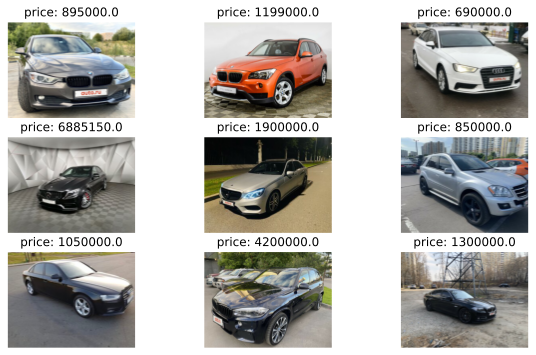

In [95]:
# зададим размер выводимого изображения
plt.figure(figsize=(10, 6))
# 9 случайных примеров из train
random_image = train.sample(n=9)
random_image_paths = random_image['sell_id'].values
random_image_cat = random_image['price'].values
# выведем 9 изображений автомобилей и цен к ним
for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(DATA_DIR+'img/img/' + str(path) + '.jpg')
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('price: ' + str(random_image_cat[index]))
    plt.axis('off')
plt.show()

In [96]:
# установим размер изображения
size = (320, 240)
# функция для загрузки изображений


def get_image_array(index):
    images_set = []
    for index, sell_id in enumerate(data['sell_id'].iloc[index].values):
        image = cv2.imread(DATA_DIR + 'img/img/' + str(sell_id) + '.jpg')
        assert(image is not None)
        image = cv2.resize(image, size)  # изменение размера
        images_set.append(image)  # добавляем изображение в массив
    images_set = np.array(images_set)
    print('images shape', images_set.shape, 'dtype', images_set.dtype)
    return(images_set)


# применим функцию для создания выборок
images_train = get_image_array(X_train.index)
images_test = get_image_array(X_test.index)
images_sub = get_image_array(X_sub.index)

images shape (5345, 240, 320, 3) dtype uint8
images shape (1337, 240, 320, 3) dtype uint8
images shape (1671, 240, 320, 3) dtype uint8


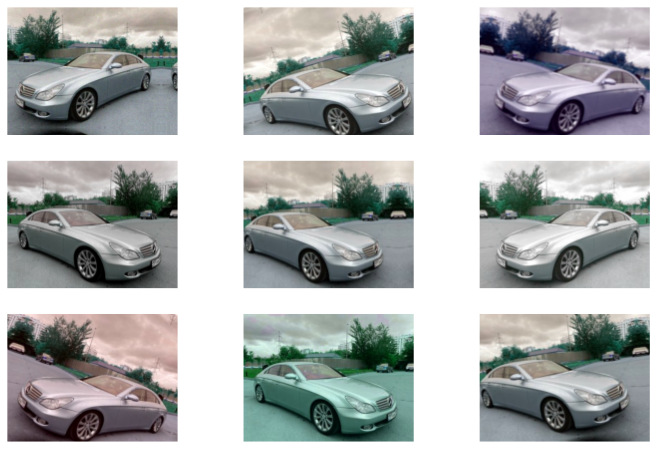

In [97]:
augment_module = a.Compose([
    # добавляем размытие по Гауссу и шум с вероятностью 7%
    a.Blur(p=0.07),
    a.GaussNoise(p=0.07),
    #  Установим параметры сдвига,поворота и масштабирования, а также укажем их вероятность.
    a.ShiftScaleRotate(shift_limit=0.08,
                       scale_limit=0.05,
                       border_mode=4,
                       rotate_limit=20,
                       p=0.7),

    a.RGBShift(),
    a.HueSaturationValue(),  # случайный оттенок и насыщенность
    a.HorizontalFlip(),

    # установим случайную яркость и контрастность изображений с вероятностью 50%

    a.OneOf([
            a.RandomBrightnessContrast(
                brightness_limit=0.3, contrast_limit=0.3),
            a.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)],
            p=0.3)
])

# Выведем пример аугментации
plt.figure(figsize=(12, 8))
for i in range(9):
    img = augment_module(image=images_train[0])['image']
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [98]:
# загрузим морфологический анализатор и скопируем данные из исходного дата-сета
morphy = pymorphy2.MorphAnalyzer()
df_NLP = data.copy()

In [99]:
# паттерн с символами
trash_sym = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-–»«•∙·✔➥●☛“”°№₽®]+"

# функция для лемматизации текста:


def lemma(text):
    text = text.lower()  # понижаем регистр
    text = re.sub(trash_sym, ' ', text)  # удаляем символы из паттерна
    strings = []  # создаем массив, в котором будут храниться лемматизированные строки
    for wrd in text.split():  # берем слово из строки
        wrd = wrd.strip()  # убираем пробелы до и после слова
        wrd = morphy.normal_forms(wrd)[0]  # приводим к нормальной форме
        strings.append(wrd)  # добавляем слово в строку массива
    return ' '.join(strings)  # вернем значения, разделив пробелами

In [100]:
# применим функцию к датасету
strings_set = []
strings_set = df_NLP.apply(
    lambda df_NLP: lemma(df_NLP.description), axis=1)

In [101]:
# загрузим список стоп-слов
russian_stopwords = stopwords.words("russian")

In [102]:
# функция для проверки на стоп-слова
def lineWithoutStopWords(line):
    line = line.split()  # разделяем на слова
    # возвращаем слово, если оно не в списке стоп-слов
    return [word for word in line if word not in russian_stopwords]


# применим функцию к нашим лемматизированым строкам слов
str_without_stop = [lineWithoutStopWords(line) for line in strings_set]

In [103]:
# split данных
text_train = data.description.iloc[X_train.index]
text_test = data.description.iloc[X_test.index]
text_sub = data.description.iloc[X_sub.index]

In [104]:
# The maximum number of words to be used. (most frequent)
MAX_WORDS = 100000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 256

In [105]:
# обучение токенизатора для NLP
tokenize = Tokenizer(num_words=MAX_WORDS)
tokenize.fit_on_texts(str_without_stop)

In [106]:
# аугментация изображений
def process_image(image):
    return augment_module(image=image.numpy())['image']

# векторизация строки
def tokenize_(descriptions):
    return sequence.pad_sequences(tokenize.texts_to_sequences(descriptions), maxlen=MAX_SEQUENCE_LENGTH)

# применение векторизации к тексту
def tokenize_text(text):
    return tokenize_([text.numpy().decode('utf-8')])[0]

# функция  для применения вышеупомянутых функций к входным данным обучающей выборки
def tf_process_train_dataset_element(image, table_data, text, price):
    im_shape = image.shape
    [image, ] = tf.py_function(process_image, [image], [tf.uint8])
    image.set_shape(im_shape)
    [text, ] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price

# функция  для применения вышеупомянутых функций к входным данным валидационной и тестовой выборкок
def tf_process_val_dataset_element(image, table_data, text, price):
    [text, ] = tf.py_function(tokenize_text, [text], [tf.int32])
    return (image, table_data, text), price


# использование tf.data.Dataset с использованием функций для обучающей выборки
train_dataset = tf.data.Dataset.from_tensor_slices((
    images_train, X_train, data.description.iloc[X_train.index], y_train
)).map(tf_process_train_dataset_element)

# использование tf.data.Dataset с использованием функций для валидационной выборки
test_dataset = tf.data.Dataset.from_tensor_slices((
    images_test, X_test, data.description.iloc[X_test.index], y_test
)).map(tf_process_val_dataset_element)

# использование tf.data.Dataset с использованием функций для тестовой выборки
y_sub = np.zeros(len(X_sub))
sub_dataset = tf.data.Dataset.from_tensor_slices((
    images_sub, X_sub, data.description.iloc[X_sub.index], y_sub
)).map(tf_process_val_dataset_element)

# проверяем, что нет ошибок 
train_dataset.__iter__().__next__()
test_dataset.__iter__().__next__()
sub_dataset.__iter__().__next__()

2022-08-23 15:51:53.163020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 15:51:53.278746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 15:51:53.279585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-23 15:51:53.283080: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

((<tf.Tensor: shape=(240, 320, 3), dtype=uint8, numpy=
  array([[[130, 123, 120],
          [128, 121, 118],
          [170, 163, 160],
          ...,
          [147, 152, 153],
          [219, 228, 231],
          [201, 212, 216]],
  
         [[186, 179, 176],
          [229, 222, 219],
          [210, 203, 200],
          ...,
          [152, 157, 158],
          [220, 229, 232],
          [200, 211, 215]],
  
         [[175, 168, 165],
          [224, 217, 214],
          [214, 207, 204],
          ...,
          [157, 162, 165],
          [221, 230, 233],
          [200, 211, 215]],
  
         ...,
  
         [[127, 118, 105],
          [118, 109,  96],
          [130, 121, 108],
          ...,
          [133, 121, 115],
          [145, 132, 124],
          [174, 162, 152]],
  
         [[124, 113,  99],
          [131, 119, 107],
          [123, 111,  99],
          ...,
          [156, 147, 138],
          [153, 143, 133],
          [163, 153, 143]],
  
         [[133, 122, 10

In [107]:
# загрузка модели
xception_model = tf.keras.applications.xception.Xception(
    weights='imagenet', include_top=False, input_shape=(size[1], size[0], 3))
xception_model.trainable = True

83697664/83683744 [==============================] - 0s 0us/step


In [108]:
# Заморозка части слоев
for layer in xception_model.layers[:len(xception_model.layers)//4]:
    layer.trainable = False

In [109]:
# проверка настроек модели
print(len(xception_model.layers))

for layer in xception_model.layers:
    print(layer, layer.trainable)

132
<keras.engine.input_layer.InputLayer object at 0x7f8187e5a510> False
<keras.layers.convolutional.Conv2D object at 0x7f813b1d57d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f813c380110> False
<keras.layers.core.Activation object at 0x7f8155999c50> False
<keras.layers.convolutional.Conv2D object at 0x7f81387c3450> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f8144a16d50> False
<keras.layers.core.Activation object at 0x7f8155a5c7d0> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f81557c6710> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f81557e45d0> False
<keras.layers.core.Activation object at 0x7f812b69d990> False
<keras.layers.convolutional.SeparableConv2D object at 0x7f81559af5d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7f813b1d5490> False
<keras.layers.convolutional.Conv2D object at 0x7f8155a4b3d0

In [110]:
# добавление output-слоя
xception_output = L.GlobalAveragePooling2D()(xception_model.output)

In [111]:
# табличная нейронная сеть
tabular_model = Sequential([
    L.Input(shape=X.shape[1]),
    L.Dense(512, input_dim=X_train.shape[1], activation="relu"),
    L.Dropout(0.5),
    L.Dense(256, kernel_regularizer=regularizers.l2(
        l2=1e-6), activation="relu"),
    L.Dropout(0.5),
    L.Dense(128, kernel_regularizer=regularizers.l2(
        l2=1e-5), activation="relu"),
    L.Dropout(0.25)
])
# я,как и автор бейзлайна, находила информацию о TabNet, но не смогла разобраться быстро,как ее загрузить и применить

In [112]:
# нейронная сеть для NLP
nlp_model = Sequential([
    L.Input(shape=MAX_SEQUENCE_LENGTH, name="seq_description"),
    L.Embedding(len(tokenize.word_index)+1, MAX_SEQUENCE_LENGTH,),
    L.LayerNormalization(),
    L.LSTM(256, return_sequences=True),
    L.Dropout(0.5),
    L.Dense(128, activation="sigmoid"),
    L.Dropout(0.5),
    L.LSTM(64,),
    L.Dropout(0.25),
    L.Dense(64, activation="relu"),
    L.Dropout(0.25),
])

In [113]:
# объединяем выходы трех нейросетей
combinedInput = L.concatenate(
    [xception_output, tabular_model.output, nlp_model.output])

# голова multi-input NN
head = L.Dense(128, activation="relu")(combinedInput)
head = L.Dense(1,)(head)
# агрегирруем все в одну модель
model = Model(inputs=[xception_model.input,
                      tabular_model.input, nlp_model.input], outputs=head)
# описание модели
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 240, 320, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 119, 159, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 119, 159, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 119, 159, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [114]:
# оптимизатор и начальная LR
optimizer = tf.keras.optimizers.Adam(0.01)

# компиляция модели
model.compile(loss='MAPE', optimizer=optimizer, metrics=['MAPE'])

In [115]:
# зададим коллбэк функции для обучения нейронки

checkpoint = ModelCheckpoint(
    '../working/best_model.hdf5', monitor=['val_MAPE'], verbose=0, mode='min')

earlystop1 = EarlyStopping(
    monitor='val_MAPE', patience=10, restore_best_weights=True,)

lr_scheduler1 = ReduceLROnPlateau(monitor='val_loss',
                                  factor=0.5,  # уменьшим lr в 2 раза
                                  patience=3,  # если нет улучшения через 3 эпохи - уменьшить lr
                                  min_lr=0.00001,  # минимальная скорость обучения
                                  verbose=1,  # выводить сообщения об уменьшении скорости
                                  mode='auto')  # выбранный способ отслеживания метрики
callbacks_list1 = [checkpoint, earlystop1, lr_scheduler1]

In [116]:
# обучение модели
history = model.fit(train_dataset.batch(30),
                    epochs=100,
                    validation_data=test_dataset.batch(30),
                    callbacks=callbacks_list1
                    )

2022-08-23 15:52:08.772614: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1231488000 exceeds 10% of free system memory.
2022-08-23 15:52:09.647713: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1231488000 exceeds 10% of free system memory.


Epoch 1/100


2022-08-23 15:52:19.354017: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


179/179 [==============================] - 86s 402ms/step - loss: 36.3555 - MAPE: 36.3461 - val_loss: 16.5241 - val_MAPE: 16.5105


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
179/179 [==============================] - 71s 396ms/step - loss: 18.5199 - MAPE: 18.5040 - val_loss: 14.1964 - val_MAPE: 14.1787
Epoch 3/100
179/179 [==============================] - 70s 393ms/step - loss: 16.9204 - MAPE: 16.9015 - val_loss: 13.9482 - val_MAPE: 13.9279
Epoch 4/100
179/179 [==============================] - 70s 394ms/step - loss: 16.0554 - MAPE: 16.0341 - val_loss: 17.6086 - val_MAPE: 17.5866
Epoch 5/100
179/179 [==============================] - 71s 394ms/step - loss: 15.9009 - MAPE: 15.8781 - val_loss: 12.8916 - val_MAPE: 12.8680
Epoch 6/100
179/179 [==============================] - 71s 394ms/step - loss: 14.9149 - MAPE: 14.8903 - val_loss: 14.8235 - val_MAPE: 14.7982
Epoch 7/100
179/179 [==============================] - 71s 394ms/step - loss: 14.8395 - MAPE: 14.8132 - val_loss: 12.6171 - val_MAPE: 12.5898
Epoch 8/100
179/179 [==============================] - 70s 393ms/step - loss: 14.5839 - MAPE: 14.5553 - val_loss: 13.3258 - val_MAPE: 13.2960
Epoch 

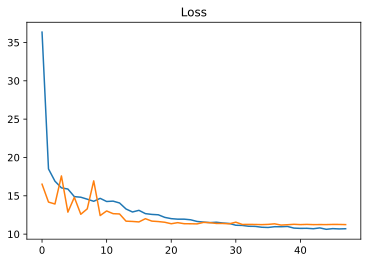

In [117]:
# визуализация графика потерь
plt.title('Loss')
plt.plot(history.history['MAPE'], label='train')
plt.plot(history.history['val_MAPE'], label='test')
plt.show()

In [118]:
# загрузка лучших весов модели и сохранение лучшей модели
model.load_weights('../working/best_model.hdf5')
model.save('../working/nn_final.hdf5')

In [119]:
# вычисление метрики для модели NLP+MLP+XCeption Multi Input NN
test_predict_nn = model.predict(test_dataset.batch(30))
print(f"TEST mape: {(mape(y_test, test_predict_nn[:,0]))*100:0.2f}%")

TEST mape: 11.24%


In [120]:
# создадим сабмит для модели NLP+MLP+XCeption Multi Input NN
sub_predict_nn = model.predict(sub_dataset.batch(30))
sample_submission['price'] = sub_predict_nn[:, 0]
sample_submission.to_csv('nn_submission.csv', index=False)

In [121]:
# вычисление метрики для  блендинга моделей ML и NLP+MLP+XCeption Multi Input NN
blend_predict = (predict_test_ml + test_predict_nn[:, 0]) / 2
print(f"TEST mape: {(mape(y_test, blend_predict))*100:0.2f}%")

TEST mape: 10.85%


In [122]:
# создадим сабмит для блендинга моделей ML и NLP+MLP+XCeption Multi Input NN
blend_sub_predict = (sub_predict_ml + sub_predict_nn[:, 0]) / 2
sample_submission['price'] = blend_sub_predict
sample_submission.to_csv('blend_submission.csv', index=False)